In [1]:
#reading the ascii file

with open('D:/Thesis/LASD/measurements/zsysdf.ascii', 'r') as file:
    content = file.readline()
    print(content)

galaxy	Dec	Dx_max	Dx_max_16percentile	Dx_max_50percentile	Dx_max_84percentile	Dx_mean	Dx_mean_16percentile	Dx_mean_50percentile	Dx_mean_84percentile	EW	EW_16percentile	EW_50percentile	EW_84percentile	FWHM_max	FWHM_max_16percentile	FWHM_max_50percentile	FWHM_max_84percentile	FWHM_neg	FWHM_neg_16percentile	FWHM_neg_50percentile	FWHM_neg_84percentile	FWHM_pos	FWHM_pos_16percentile	FWHM_pos_50percentile	FWHM_pos_84percentile	F_cont	F_cont_16percentile	F_cont_50percentile	F_cont_84percentile	F_lc	F_lc_16percentile	F_lc_50percentile	F_lc_84percentile	F_max	F_max_16percentile	F_max_50percentile	F_max_84percentile	F_neg_max	F_neg_max_16percentile	F_neg_max_50percentile	F_neg_max_84percentile	F_pos_max	F_pos_max_16percentile	F_pos_max_50percentile	F_pos_max_84percentile	F_valley	F_valley_16percentile	F_valley_50percentile	F_valley_84percentile	L_neg	L_neg_16percentile	L_neg_50percentile	L_neg_84percentile	L_pos	L_pos_16percentile	L_pos_50percentile	L_pos_84percentile	L_tot	L_tot_16percentile	L_

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#extracting data
with open('D:/Thesis/LASD/measurements/zsysdf.ascii', 'r') as file:
    header = file.readline().strip().split()

    L_pos = []
    L_tot = []
    EW = []
    L_neg = []
    x_pos_max = []
    x_pos_mean = []
    x_neg_max = []
    x_neg_mean = []
    F_cont = []
    
    for line in file:
        values = line.strip().split()

        try:
           L_pos.append(float(values[header.index('L_pos')]))
           L_tot.append(float(values[header.index('L_tot')]))
           L_neg.append(float(values[header.index('L_neg')]))
           EW.append(float(values[header.index('EW')]))
           x_pos_max.append(float(values[header.index('x_pos_max')]))# Peak position determined by maximum luminosity density on red side
           x_pos_mean.append(float(values[header.index('x_pos_mean')]))
           x_neg_max.append(float(values[header.index('x_neg_max')]))
           x_neg_mean.append(float(values[header.index('x_neg_mean')]))
           F_cont.append(float(values[header.index('F_cont')])) 
        except ValueError:
            continue

#making numpy arrays
L_pos = np.array(L_pos)
L_neg = np.array(L_neg)
L_tot = np.array(L_tot)
EW = np.array(EW)
x_pos_max = np.array(x_pos_max)
F_cont = np.array(F_cont)



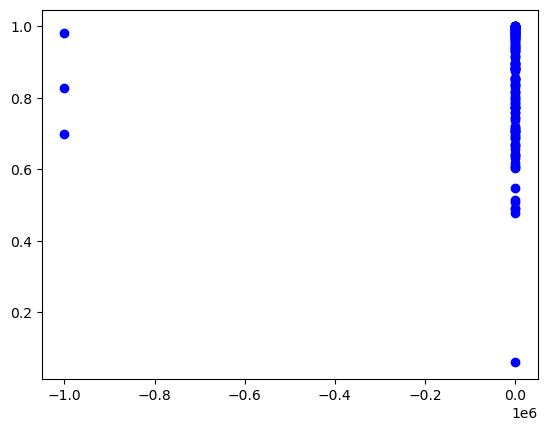

In [3]:

L_pos_L_tot = [l_pos / l_tot for l_pos, l_tot in zip(L_pos, L_tot)]
plt.scatter(EW, L_pos_L_tot, label='L_pos/L_tot vs EW', color='blue')



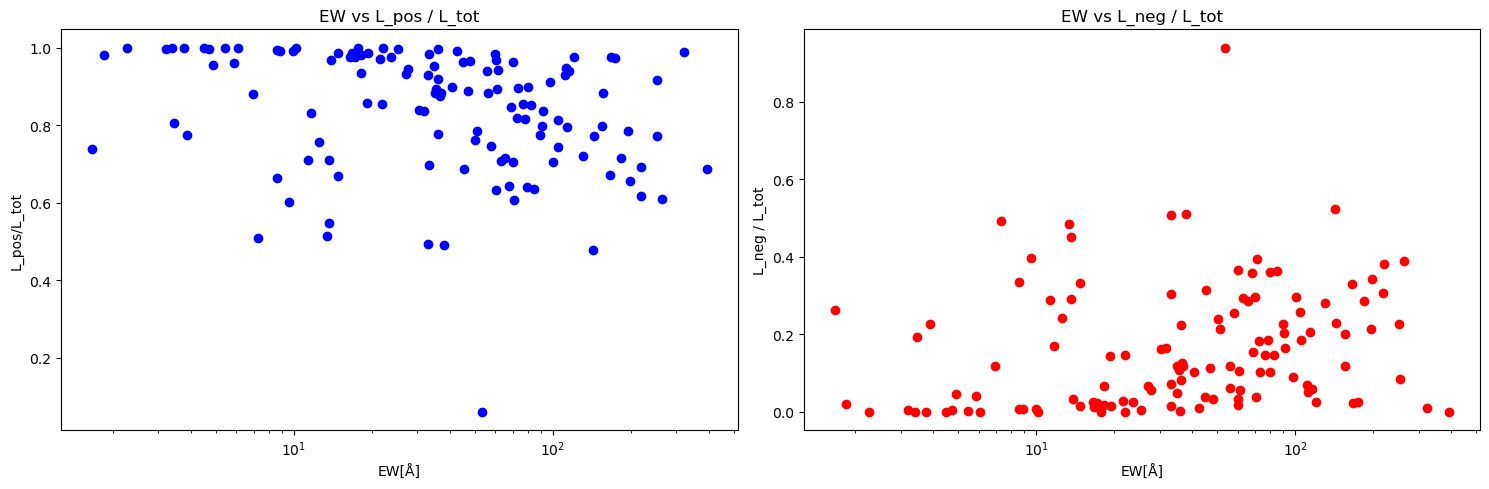

In [4]:
#plotting asymmetry and EW
asymmetry1 = L_pos/L_tot
asymmetry2 = L_neg/L_tot

# L_pos / L_tot vs EW
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(EW, asymmetry1, color = 'blue')
#axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylabel('L_pos/L_tot')
axs[0].set_xlabel('EW[Å]')
axs[0].set_title('EW vs L_pos / L_tot')
#axs[0].legend()

#  L_neg / L_tot vs EW
axs[1].scatter(EW, asymmetry2, color='red')
axs[1].set_xscale('log')
axs[1].set_ylabel('L_neg / L_tot')
axs[1].set_xlabel('EW[Å]')
axs[1].set_title('EW vs L_neg / L_tot')
#axs[1].legend()


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [5]:
## Trying to match the number of signals, starting with EW vs L_neg / L_tot


print(len(x_neg_max))
nan_count = np.isnan(x_neg_max).sum()
print(nan_count)

print(len(EW))
nan_count = np.isnan(EW).sum()
print(nan_count)

print(len(x_neg_mean))
nan_count = np.isnan(x_neg_mean).sum()
print(nan_count)

print(len(x_pos_max))
nan_count = np.isnan(x_pos_max).sum()
print(nan_count)

print(len(x_pos_mean))
nan_count = np.isnan(x_pos_mean).sum()
print(nan_count)

126
40
126
0
126
40
126
3
126
3


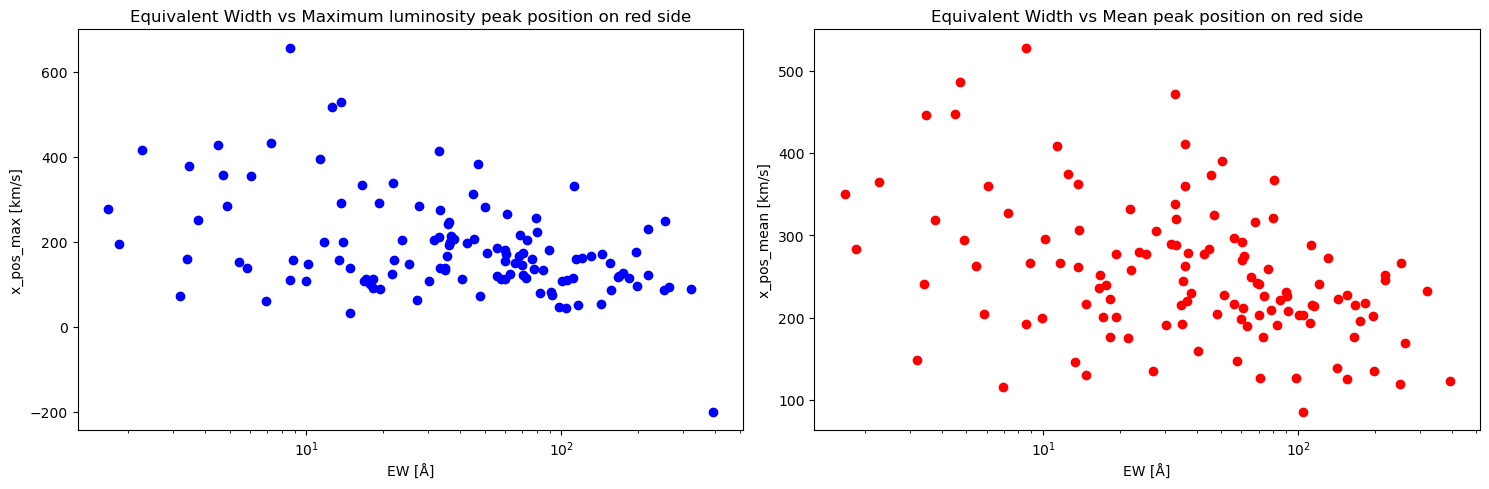

In [6]:
#plotting peak positions(red side) and EW

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(EW, x_pos_max, color = 'blue')
axs[0].set_xscale('log')
axs[0].set_ylabel('x_pos_max [km/s]')
axs[0].set_xlabel('EW [Å]')
axs[0].set_title('Equivalent Width vs Maximum luminosity peak position on red side')
#axs[0].legend()

#  L_neg / L_tot vs EW
axs[1].scatter(EW, x_pos_mean, color='red')
axs[1].set_xscale('log')
axs[1].set_ylabel('x_pos_mean [km/s]')
axs[1].set_xlabel('EW [Å]')
axs[1].set_title('Equivalent Width vs Mean peak position on red side')
#axs[1].legend()


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

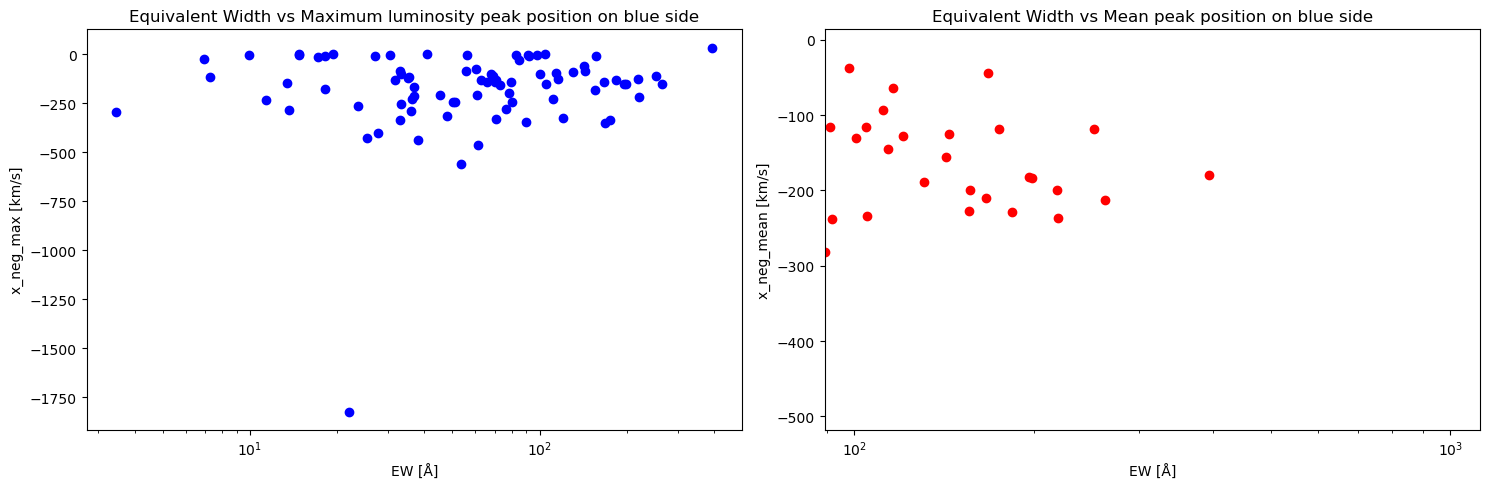

In [7]:
#plotting peak positions(blue side) and EW

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(EW, x_neg_max, color = 'blue')
axs[0].set_xscale('log')
axs[0].set_ylabel('x_neg_max [km/s]')
axs[0].set_xlabel('EW [Å]')
axs[0].set_title('Equivalent Width vs Maximum luminosity peak position on blue side')
#axs[0].legend()

#  L_neg / L_tot vs EW
axs[1].scatter(EW, x_neg_mean, color='red')
axs[1].set_xscale('log')
axs[1].set_ylabel('x_neg_mean [km/s]')
axs[1].set_xlabel('EW [Å]')
axs[1].set_title('Equivalent Width vs Mean peak position on blue side')
#axs[1].legend()


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [43]:
#plt.hist2d(EW, x_neg_max, bins=50, cmap='magma')

Text(0.5, 1.0, 'Equivalent Width vs Total Luminosity')

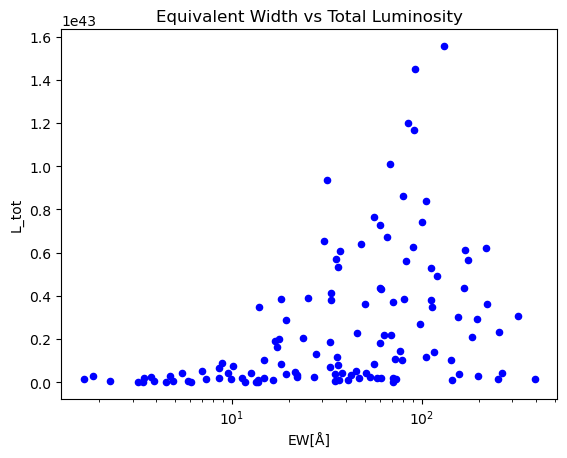

In [9]:
#total mlumiosity vs equivalent width

plt.scatter(EW, L_tot, color='blue', s = 20)
#plt.yscale('log')
plt.xscale('log')
plt.ylabel('L_tot')
plt.xlabel('EW[Å]')
plt.title('Equivalent Width vs Total Luminosity')
#plt.legend()

Text(0.5, 1.0, '2D Histogram of L_tot vs EW')

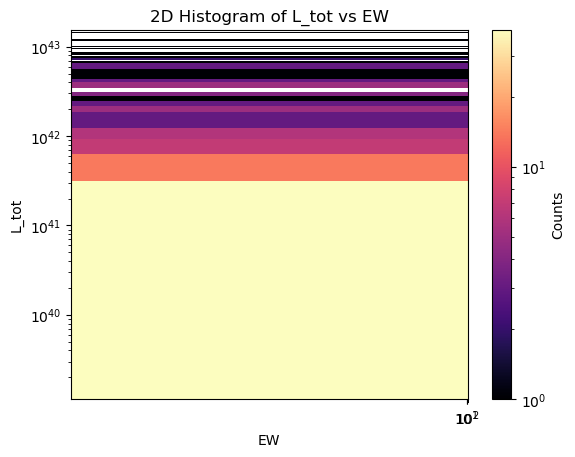

In [31]:
import matplotlib as mpl

plt.hist2d(EW, L_tot, bins=50, cmap='magma', norm=mpl.colors.LogNorm())
plt.colorbar(label='Counts')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('EW')
plt.ylabel('L_tot')
plt.title('2D Histogram of L_tot vs EW')
